In [17]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [18]:
import ipywidgets
from ipywidgets import interact
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import csv

In [7]:
df = pd.read_csv("C:/Users/paulc/Desktop/Stage/lmt-analysis-2022/LMT/scripts/Dataframes/Merge.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86976 entries, 0 to 86975
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      86976 non-null  int64  
 1   Filename        86976 non-null  object 
 2   Date            86976 non-null  int64  
 3   Cage            86976 non-null  object 
 4   Injection       86976 non-null  object 
 5   Night-Phase     86976 non-null  int64  
 6   Bin             86976 non-null  int64  
 7   start_frame     86976 non-null  int64  
 8   stop_frame      86976 non-null  int64  
 9   name            86976 non-null  object 
 10  idA             86976 non-null  int64  
 11  idB             66024 non-null  float64
 12  idC             4200 non-null   float64
 13  idD             0 non-null      float64
 14  RFidA           86976 non-null  int64  
 15  RFidB           85824 non-null  float64
 16  RFidC           78126 non-null  float64
 17  RFidD           0 non-null     

In [29]:
dropdown = ipywidgets.Dropdown(options=list(range(8,21)),
                               value=8,
                               description="Number :",
                               disable=False)

def generate_password(length):
    import string
    import random
    password_choices = string.ascii_letters+'123456789'+'!@#$%^&*'
    password = [random.choice(password_choices) for _ in range(length)]
    return ''.join(password)

ipywidgets.interact(generate_password, length=dropdown)


interactive(children=(Dropdown(description='Number :', options=(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, …

<function __main__.generate_password(length)>

In [33]:
dropdown = ipywidgets.Dropdown(options=df['Date'].unique(),
                               value=df['Date'].unique()[0],
                               description="Date :",
                               disable=False)

def choice_date(length):
    dates = df['Date'].unique()

ipywidgets.interact(choice_date, length=dropdown)

interactive(children=(Dropdown(description='Date :', options=(221013, 221017, 221018, 221019, 221020, 221021, …

<function __main__.choice_date(length)>

In [42]:
# Select specific rows of df
date = input("What date do you want to use ?")
temp_df = df[(df["Date"] == date) & (df["Cage"] == 'Cage1') & (df["name"] == 'Move isolated') & (df["Night-Phase"] == 1)]
print(temp_df)

What date do you want to use ? 221013


Empty DataFrame
Columns: [Unnamed: 0, Filename, Date, Cage, Injection, Night-Phase, Bin, start_frame, stop_frame, name, idA, idB, idC, idD, RFidA, RFidB, RFidC, RFidD, GenoA, GenoB, GenoC, GenoD, totalLength, meanLength, medianLength, numberOfEvents, stdLength, CI95_low, CI95_up]
Index: []

[0 rows x 29 columns]


In [13]:
# Smaller df
final_df = temp_df[['numberOfEvents', 'RFidA', 'Bin', 'GenoA']]
print("final_df")
print(final_df)

final_df
      numberOfEvents    RFidA  Bin GenoA
3               2285  4849450    1  NaCl
4               1817  4849319    1  NaCl
5               2011  4849076    1  NaCl
120             2242  4849450    2  NaCl
121             1084  4849319    2  NaCl
122             2182  4849076    2  NaCl
237             1443  4849450    3  NaCl
238             1311  4849319    3  NaCl
239             1094  4849076    3  NaCl
354             1778  4849450    4  NaCl
355             1542  4849319    4  NaCl
356             1812  4849076    4  NaCl
471             2084  4849450    5  NaCl
472             1754  4849319    5  NaCl
473             2333  4849076    5  NaCl
588             2243  4849450    6  NaCl
589             2013  4849319    6  NaCl
590             2374  4849076    6  NaCl
705             2357  4849450    7  NaCl
706             2433  4849319    7  NaCl
707             2428  4849076    7  NaCl
822             4274  4849450    8  NaCl
823             3971  4849319    8  NaCl
824    

In [14]:
# Preparing for plot
bins = final_df['Bin'].unique()
animals = final_df['RFidA'].unique()
print("animals")
print(animals)
nbrAnimals = len(animals)
nbrEvents = {}

animals
[4849450 4849319 4849076]


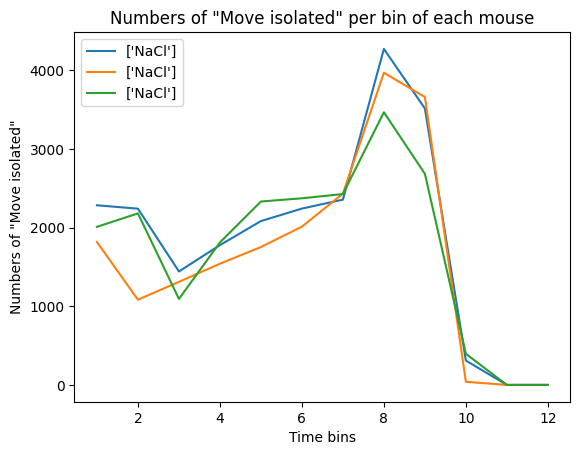

nbr events


In [15]:
# Plot
for i in animals:
    x=final_df[final_df["RFidA"] == i]['Bin']
    y=final_df[final_df["RFidA"] == i]["numberOfEvents"]
    plt.plot(x,y, label = final_df[final_df["RFidA"] == i]['GenoA'].unique())
plt.title('Numbers of "Move isolated" per bin of each mouse')
plt.xlabel('Time bins')
plt.ylabel('Numbers of "Move isolated"')
plt.legend(loc = "upper left")
plt.show()
print("nbr events")

In [5]:
def square(x):
    x**2
interact(square, x = (0,20))

interactive(children=(IntSlider(value=10, description='x', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.square(x)>